<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Виктор! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>



---
    
Для лучшей коммуникации будет лучше если ты будешь оставлять ответные комментарий (cвои комментарии к исправлениям, вопросы), так результат будет лучше.  А чтобы ревьюры их не теряли, лучше их подсвечивать цветом (можешь выбрать свой, а можешь использовать   тот который я предложил ниже). И чтобы не возникло путаницы лучше оставлять указание на номер версии комментария по итерация:  

1 итерация

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат!.</div>


2 итерация

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>
    
    
И лучше подсвечивать свои комментарии цветом, для этого достаточно в ячейку markdown добавить: 

```html
<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>    

```    
    
Хорошая коммуникация залог успеха! )
    
---

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

**Заказчик:** 
Интернет-магазин «Викишоп» 


**Описание проекта:** 
заказчик запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Цель проекта:**

Обучить модель классифицировать комментарии на позитивные и негативные. Соответственно, в ходе проекта будет решена задача бинарной классификации.

Необходимо, чтобы метрика качества *F1* имела значение не меньше 0.75. 

**Ход исследования**
- **Подготовка данных**: загрузка и изучение общей информации о предоставленном датасете. Корректировка типов данных, дубликатов и пропусков. Токенизация, лемматизация, векторизация текстов. Разбивка данных на выборки перед обучением моделей.

- **Обучение и оценка моделей**: обучение моделей для задачи классификации. Оценка качества, выбор лучшей модели  и её проверка на тестовой выборке.

- **Общий вывод** и подведение итогов по проделанным работам, рекомендации заказчику.

In [1]:
!pip install --upgrade scikit-learn -q
!pip install wordcloud==1.8.2.2 -q
!pip install vaderSentiment -q
!pip install --upgrade Pillow -q

In [2]:
import os

import numpy as np
import scipy.stats as stats

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from itertools import product

from tqdm.notebook import tqdm

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

RANDOM_STATE = 42

## Подготовка
<a href="#Содержание">Назад к содержанию</a>

Для начала загрузим данные. Применим библиотеку os, чтобы убедиться в корректности пути, по которому находится датасет.

In [3]:
pth = '/datasets/toxic_comments.csv'
if os.path.exists(pth):
    toxic_comments = pd.read_csv(pth)
    display(toxic_comments.head(), toxic_comments.shape)
else:
    print('Something is wrong')

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


(159292, 3)

Всего в датасете 3 признака и 159292 наблюдения. Помимо текстов и таргета присутствует лишний признак «Unnamed: 0». Он дублирует индекс датасета и не имеет значения для дальнейшего обучения, удалим его.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    


Он не совсем дублирует. Unnamed: 0 это "след" старых индексов. Если ты уберёшь первые 10 примеров и своего датасета, сохранишь его, а потом откроешь,  то появится столбец Unnamed: 0 начиная с цифры 9, и появится новый индексы начиная с нуля 


Но это мелочь,  даже не нужно ничего исправлять. Просто знай, чтобы увидев такое в чужом коде не удивляться что бы это могло означать

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат! Понял, буду знать</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Виктор!


 

In [4]:
toxic_comments = toxic_comments.drop('Unnamed: 0', axis=1)
toxic_comments.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Проверим данные на наличие пропусков.

In [5]:
toxic_comments.isna().sum()

text     0
toxic    0
dtype: int64

Пропуски отсутствуют, проверим наличие дубликатов.

In [6]:
toxic_comments.duplicated(subset='text').sum()

0

Одинаковые тексты отсутствуют. Убедимся, что таргет принимает только 2 значения — 1 и 0.

In [7]:
toxic_comments['toxic'].unique()

array([0, 1])

Убедимся в корректности типов данных:

In [8]:
toxic_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Типы данных распределены корректно. Теперь проанализируем распределение меток класса.

'Частота значений для признака: toxic'

0    143106
1     16186
Name: toxic, dtype: int64

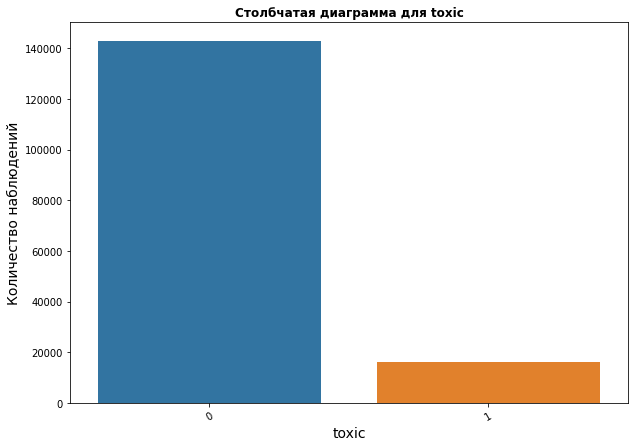

In [9]:
plt.figure(figsize=(10, 7))

sns.countplot(data=toxic_comments, x='toxic')
plt.title('Столбчатая диаграмма для toxic', fontweight='bold')
plt.ylabel('Количество наблюдений', fontsize=14)
plt.xlabel('toxic', fontsize=14)
plt.xticks(rotation=30)
display('Частота значений для признака: toxic',
        toxic_comments['toxic'].value_counts()
       ) 
plt.show()  

Негативных текстов в разы меньше (в 8.84 раза). При разбиении данных на выборки необходимо будет учесть дисбаланс классов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
Плюс за   проверку на сбалансированность 


 


<div class="alert alert-warning">

Совет: 


 

- можно также посчитать количество слов в предложений,  длину слов в твите, опять же в разбивке по Таргету.  Если будут какие-то сильные отличия, возможно из-за этого стоит сгенерировать дополнительные признаки для наших моделей. Или например можно использовать библиотеку SentimentIntensityAnalyzer для оценки сантиментов, и посмотреть насколько хорошо ее оценки корелирует с нашими таргетами
   
   
- когда мы работаем с текстами, describe итп описательные статистике не использовать, но можно провести частотный анализ текста.  Предлагаю для этого использовать [облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах (в облаке уже автоматически будут убраны стоп слова). Кроме того графики, рисунки делают проект визуально интересней
   
   
В тренажере облако импортируем так

    !pip install wordcloud 


или

    !pip install wordcloud==1.8.2.2  


И возможно дополнительно надо будет сделать



    !pip install --upgrade Pillow  (попробуй версию 9.5.0)

     

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Ниже применил SentimentIntensityAnalyzer, облако слов почему-то никак не хочет работать. Пробовал с таким кодом:
    
    all_lemmas = [lemma for sublist in toxic_comments['text'] for lemma in sublist]
    full_text = ' '.join(all_lemmas)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(full_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()

Выдаёт ошибку: «ValueError: Only supported for TrueType fonts». 
    
Пробовал по твоему совету !pip install --upgrade Pillow, не помогло. Также не помогло указывать вручную параметр облака font_path='/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', хотя шрифт относится к TrueType
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 К сожалению кроме выше озвученных вариантов как в побороть эту ошибку не знаю. Примерно у 20% студентов не получается построить облако.  Причём в один день может быть построено в другой нет.  Видимо какие-то проблемы с версиями библиотек

Загружены предсказанные классы из файла.


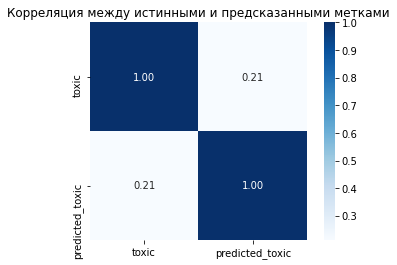

In [10]:
analyzer = SentimentIntensityAnalyzer()

tqdm.pandas()
predicted_file = 'predicted_toxic.csv'

def get_predicted_class(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    # compound <= 0 - класс 1 (негативный), > 0 - класс 0 (позитивный)
    return 1 if compound <= 0 else 0

try:    
    predicted_data = pd.read_csv(predicted_file)
    toxic_comments['predicted_toxic'] = predicted_data['predicted_toxic']
    print("Загружены предсказанные классы из файла.")
    
except FileNotFoundError:
    toxic_comments['predicted_toxic'] = toxic_comments['text'].progress_apply(get_predicted_class)
    toxic_comments[['predicted_toxic']].to_csv(predicted_file, index=False)
    print("Предсказанные классы рассчитаны и сохранены в файл.")

sns.heatmap(toxic_comments[['toxic', 'predicted_toxic']].corr(), annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title('Корреляция между истинными и предсказанными метками')
plt.show()

Между фактическими метками классов и оценками SentimentIntensityAnalyzer корреляция слабая положительная — 0.21

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(Некоторые пробуют добавить его в качестве признака, но к повышение метрики это не приводит) 

Теперь проведем токенизацию и лемматизацию текста с помощью функции.

In [11]:
nlp = spacy.load('en_core_web_sm')

tqdm.pandas()
stop_words = set(nlp.Defaults.stop_words)

def preprocess_text(text):
    doc = nlp(text)
    lemmatized_tokens = [
        token.lemma_.lower() 
        for token in doc 
        if token.is_alpha and not token.is_stop
    ]
    return lemmatized_tokens

output_file = 'lemmatized_comments.pkl'

try:
    toxic_comments = pd.read_pickle(output_file)
    print("Данные загружены из файла:", output_file)
    
except FileNotFoundError:
    toxic_comments['text'] = toxic_comments['text'].progress_apply(preprocess_text)
    toxic_comments.to_pickle(output_file)
    print("Данные сохранены в файл:", output_file)

toxic_comments.head()

Данные загружены из файла: lemmatized_comments.pkl


,text,toxic
0,"[explanation, edit, username, hardcore, metall...",0
1,"[match, background, colour, seemingly, stuck, ...",0
2,"[hey, man, try, edit, war, guy, constantly, re...",0
3,"[real, suggestion, improvement, wonder, sectio...",0
4,"[sir, hero, chance, remember, page]",0


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- WordNetLemmatizer  рабочий вариант, но у него есть особенности, для корректной работы ему нужно передавать не просто слово, но и POS-тег (Part of Speech, части речи). Набираемся ума-разума [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/) если не откроется то [тут](https://translated.turbopages.org/proxy_u/en-ru.ru.5ece9195-67a114e7-50ce8fac-74722d776562/https/www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/) или [тут](https://dnmtechs.com/wordnet-lemmatization-and-pos-tagging-in-python-3-programming/).  Обрати внимание на функцию `get_wordnet_pos`. Сразу хочу предупредить, что если делать Лемматизацию правильно, сучетом постегов, то время может занять минут 20-30 (Если больше значит есть проблемы с эффективностью кода). Так что не удивляйся (вообще советую сохранить результаты Лематизации в каком-то файлике, чтобы каждый раз не тратить на это много времени)




- Не забываем провести очистку (Убираем цифры знаки препинания...), у нас и так огромное пространство признаков после Vectorize, так зачем его увеличивать для неинформативных значений (Вряд ли цифра имеет какой-то смысл для прогнозирования токсичный - это комментарии или нет) 
 
 


 




<div class="alert alert-warning">


Совет: 




- лемматизацию можно было сделать с помощью SpaCy лемматизатором и прямо скажем как инструмент он более удобен и универсален, не нужно заморачиваться с токенизацией и учётом пос тегов




- Чтобы сэкономить время, и убедиться что всё отработало нормально, берёшь парочку предложений, создаёшь dataframe
    
    
    sentence1 = "The striped bats are hanging on their feet for best"
    sentence2 = "you should be ashamed of yourself went worked"
    df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
    print(df_my)


    print(df_my['text'].apply(func))
    
    
    
И тестируешь не нем, должно получиться 
    
    
    
    trying  ------> try, went -------> go  


(striped в данном контексте - причастие, используемое в функции прилагательного (также в кембриджском словаре помечено как adjective), соответственно, это и есть начальная форма. Так что по идее должно остаться как прежде)

Если всё получилось, то можно использовать на всём датасете

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Понял, применил лемматизацию spacy, результат сохранил в отдельный файлик. Обращаюсь к нему с помощью try-except. По поводу очистки от знаков препинания, цифр и прочего: её совершил вот в этой части кода:
    
    if token.is_alpha and not token.is_stop
    
С помощью is_alpha оставил только буквы англ алфавита, остальные символы убрал</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 Извиняюсь, не заметил 
    
    
    if token.is_alpha and not token.is_stop

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



правильно, не нужно трогать разряженные матрицы

 

Теперь разобъём данные на тренировочную и тестовые выборки с параметром stratify — чтобы пропорции классов сохранились во всех выборках.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    toxic_comments.drop('toxic', axis=1),
    toxic_comments['toxic'],
    test_size= .2,
    random_state=RANDOM_STATE,
    stratify=toxic_comments['toxic']
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(127433, 1) (31859, 1) (127433,) (31859,)


Для обучения моделей далее потребуется провести векторизацию. Сделаем это с помощью TfidfVectorizer. Чтобы не сломать ядро jupiter, не будем преобразовывать эти данные в массив и затем в датафрейм — оставим в виде разреженной матрицы.

In [13]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train['text'].progress_apply(lambda tokens: ' '.join(tokens)))
X_test = vectorizer.transform(X_test['text'].progress_apply(lambda tokens: ' '.join(tokens)))
print(X_train.shape, X_test.shape, type(X_train), type(X_test))

  0%|          | 0/127433 [00:00<?, ?it/s]

  0%|          | 0/31859 [00:00<?, ?it/s]

(127433, 129194) (31859, 129194) <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>


In [14]:
print(type(X_train), type(X_test))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:




 
- по поводу использования TFIDF (как и Scaler, OHE, OE итд): fit мы не делаем на полной выборки. fit всегда делаем на тренировочной выборке. И это легко объяснить, ведь по логике моделирования мы владеем информацией только из тренировочной выборки. Поэтому "обучаемся" (fit_transform/fit) на тренировочной, а  затем "распространяем" обученный scaler на test/реальные данные на которых делает прогноз. Ну на самом деле лучшая засунуть TfidfVectorizer в pipeline, тогда не будет утечки и на валидационной выборке
    
    
 

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> 
    
Понял, обучил именно на тренировочной выборке</div>

**Вывод по подготовке данных**

- Изначальная размерность датасета — (159292 строк, 3 признака);
- Признак «Unnamed: 0» дублирует индекс датасета и не имеет значения для дальнейшего обучения. Он был удалён;
- Пропуски и дубликаты в датасете отсутствуют, типы данных назначены корректно;
- Проведена токенизация, лемматизация и векторизация текстов;
- Проведена разбивка на тренировочную и тестовую выборки (80% и 20% датасета соответственно).
- Негативных текстов в разы меньше, чем позитивных (в 8.84 раза). Это говорит о наличии дисбаланса классов;
- Между фактическими метками классов и оценками SentimentIntensityAnalyzer корреляция слабая положительная — 0.21.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- random_state на месте


 

- здорово что используешь stratify    


    
- плюс за  проверку
    
    
- здорово что подробно комментируешь свои действия
 



## Обучение
<a href="#Содержание">Назад к содержанию</a>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍  использования гиперссылок


 

Далее обучим 3 модели: логистическую регрессию, дерево решений, к-ближайших соседей. Оценим метрику их качества на кроссвалидации с помощью GridSearchCV.

In [15]:
pipeline = Pipeline(
    steps=[
    (
        'model', DecisionTreeClassifier(random_state=RANDOM_STATE)
    )  
]
)

param_grid = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 4],
        'model__min_samples_leaf': [1, 2]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5],
    },
    {
       'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
       'model__C': np.linspace(0.1, 3, 10),
    }
]

search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
best_params = search.best_params_
best_score = search.best_score_

display(F"Лучшая модель: {best_model}")
display(f"Лучшие параметры: {best_params}")
display(f"Метрика лучшей модели на кросс-валидации: {best_score}") 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


"Лучшая модель: Pipeline(steps=[('model',\n                 LogisticRegression(C=2.6777777777777776, penalty='l1',\n                                    random_state=42, solver='liblinear'))])"

"Лучшие параметры: {'model': LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), 'model__C': 2.6777777777777776}"

'Метрика лучшей модели на кросс-валидации: 0.774407209817857'

Лучшей моделью оказалась LogisticRegression с параметрами penalty='l1', random_state=42, solver='liblinear' C=2.6777777777777776. Далее проверим её качество на тестовой выборке и сравним результат с дамми-классификатором.

In [16]:
best_preds = search.best_estimator_.predict(X_test)
display(f'Метрика f1 для лучшей модели на тестовой выборке: {f1_score(y_test, best_preds):.4f}')

'Метрика f1 для лучшей модели на тестовой выборке: 0.7811'

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    
    
Нет никакого перебора гиперпараметров,  при этом непонятно откуда взялись  max_depth=10  итд - все эти значения мы не подставляем, а находим в ходе перебора  
    
 
    
Есть два варианта исправить красное:
    
    
1. Сделать перебор гиперпараметров в ручном цикле ориентируясь на метрику на валидационной выборке 
    
    
2.  Можно вместо цикла использовать sklearn-ий встроенный функционал GridSearch. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_, данные обучения положит в cv_restult_. А главное  он сделает несколько разбиений на train / validation выборки (кросс-валидация), тем самым поборется с рандомом, когда на валидации получен хороший результат только изза удачного сплита. 

А еще лучше использовать связку GridSearchCV + pipeline. 

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), это тема которая сразу затрагивает кроссвалидацию, тюнинг "векторайз", подбор гиперпараметров модели и о том что код стоит делать компактным.
    
    
- в TfidfVectorizer(stop_words=stopwords) у тебя по умолчанию ngram_range=(1, 1), тут можно подбирать разное число n- грамм (и другие параметры), максимизируя метрику, но как объединить перебор по ngram_range с обучением моделей, чтобы не делать это по отдельности или с использованием цикла?! pipeline! Готовый [пример для работы с текстами](https://medium.com/@yoni.levine/how-to-grid-search-with-a-pipeline-93147835d916). Всё что нужно там есть, хотя очень лаконично. Можешь погуглить по:


    
    pipeline nlp gridsearchcv
    
    
- как избежать ошибки подглядывания в будущее, когда мы предварительно работаем с данными (шкалирование, нормализация, TfidfVectorizer итп итд)? pipeline! особенно это важно, когда мы используем кроссвалидацию. Для TfidfVectorizer делаеь .fit (обучаемся) на train, а transform на test, точно также нужно сделать для валидационной выборки. Но GS делает валидационные внутри себя, спрашивается как добраться до них и избежать подглядывания в будущее? Казалось бы никак, но нет! Pipeline! ) 
    
    
- pipeline позволяет делать наш код компактней и читабельней, это большой плюс, когда код будет раздуваться   



В общем если сделать GS+pieline будет вообще хорошо )  
    
     


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Применил GridSearchCV, если что обучение будет минут 25-30</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 

- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации, или парочку лучших, если на валидации результаты близки


 

- Если студент получил на тесте f1 выше 0,75, это считается приемлемым результатом.


<div class="alert alert-warning">



Совет: 


Что может помочь добиться лучшего результата (от простого)? 


 
- можно поиграться [порогом](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/). Ещё можешь посмотреть в [туториале](https://scikit-learn.org/stable/modules/classification_threshold.html). Есть несколько вариантов, главное не использовать для подбора порога тестовую выборку, ведь это будет подгонка. Таким образом можно поднять метрику на процент - полтора
   
 

    
- попробовать другие модели. проект своеобразный выбор между вычислительными ограничениями (много примеров, расчеты могут затянуться) и задачей получить хорошую метрику. С этой точки зрения  интересная [моделька](https://medium.com/geekculture/passive-aggressive-algorithm-for-big-data-models-8cd535ceb2e6) (открывается с помощью VPN) [или](https://datafinder.ru/products/passivno-agressivnyy-klassifikator-v-mashinnom-obuchenii). Она считается очень шустрой     
    


- использование предбученной модели Берта, выбрав соответствующую модель и используя полученные эмбединги, даже на небольшом тренировочном датасете можно обучить модель, которая на test покажет хорошую метрику. В этом случаи можно сразу получить метрику > 0.95 (при правильно выбранной модели)







<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 


А ещё можешь посмотреть какие слова  является наиболее важным для классификации с точки зрения модели. Получаем список слов    
    
    
    
    .get_feature_names_out().tolist()
    
    
    
Получаем коэффициенты важности (для логистической регрессии)    
    
    .coef_.tolist()[0]




А потом можно построить такой-то красивый график с помощью     seaborn
 


 

In [17]:
dummy_сlf = DummyClassifier(strategy = 'constant', constant = 1)
dummy_сlf.fit(X_train, y_train)
y_pred_dummy = dummy_сlf.predict(X_test)
f1_dummy = f1_score(y_test, y_pred_dummy)
display(f'Метрика f1 на модели DummyClassifier: {f1_dummy:.4f}')

'Метрика f1 на модели DummyClassifier: 0.1845'

У логистической регрессии метрика превосходит 0.75 и значительно выше, чем у DummyClassifier — успех!

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 
    
    
Плюс за проверку.  Хотя на мой взгляд на адекватность стоит применять в разрезе метрики accuracy. А метрика f1 и без того "умная", поэтому константные модели на ней ничего интересного не покажут
    

Можешь попробовать посчитать f1    
    
    model = DummyClassifier(strategy = 'constant', constant = 1)

    
Так можно дотянуть метрику до 0,18 )   

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Метрику дотянул)</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

## Выводы
<a href="#Содержание">Назад к содержанию</a>

**Вывод по подготовке данных**

- Изначальная размерность датасета — (159292 строк, 3 признака);
- Признак «Unnamed: 0» не имеет значения для дальнейшего обучения. Он был удалён;
- Пропуски и дубликаты в датасете отсутствуют, типы данных назначены корректно;
- Проведена токенизация, лемматизация и векторизация текстов;
- Проведена разбивка на тренировочную и тестовую выборки (80% и 20% датасета соответственно);
- Негативных текстов в разы меньше, чем позитивных (в 8.84 раза). Это говорит о наличии дисбаланса классов;
- Между фактическими метками классов и оценками SentimentIntensityAnalyzer корреляция слабая положительная — 0.21.

**Вывод по обучению моделей**

- Обучено 3 модели: логистическая регрессия, дерево решений, к-ближайших соседей. Проведена оценка качества моделей на кроссвалидации;

- Лучшей моделью оказалась логистическая регрессия.

- f1 score лучшей модели на тесте — 0.7811. Это выше, чем у бейзлайн-модели dummy classifier (f1 score = 0.1845).

- Параметры лучшей модели: LogisticRegression(solver='liblinear', penalty='l1', C=2.6777777777777776,  random_state=42)

**Рекомендации заказчику**

1) Необходимо провести ручной анализ текстов, где модель дала неверный прогноз (ложноположительный или ложноотрицательный). Это поможет увидеть возможные закономерности и общие черты среди неверно классифицированных комментариев.

2) Расширить набор данных для обучения. Дополнительные примеры токсичных и нетоксичных комментариев могут повысить точность классификатора.

3) Внедрить систему мониторинга и обновления модели. Это поможет поддерживать высокое качество классификации и адаптироваться к новым условиям, так как со временем нормы языка могут изменяться. То, что сейчас считается токсичным — может таковым не быть через 5 лет.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Рекомендации заказчику хороши.  Но ведь ты сам можешь улучшить метрику, если используешь альтернативу твоему подходу - Берт.  В чём преимущество?!


TF-IDF просто считает количество того или иного слова в предложении. Так он переводит текст, который непонятен компьютеру, в числа. Но можно ведь сделать посложнее, и в качестве слова взять вектор, причём так что вектор слово "мужчина" и вектор слова "человек" были близки - то есть тут уже учитывается внутренняя материя языка. Или например известный пример: создаем такие вектора слов, что если от вектора слова "король", отнять Вектор слова "мужчина" и добавить Вектор слова "женщина", то получится Вектор близкий к вектору слова "Королева".  Это можно получить с помощью Word2Vec. Но на самом деле эмбединги (вектора) слов от Берта и подобных ему моделей (Называются модели с Улицы Сезам) еще круче, потому что они ещё и учитывают контекст слова, то есть он работает с целым предложением, и теперь эмбединг одного и того же слова может отличаться в зависимости от того в каком предложении (контексте) он стоит. 




Как мы можем использовать Берт?  



- Можем его использовать чтобы получить эмбединги и подать их в наши модели как альтернативу векторов от TFIDF/CountVectorizer (чтобы это реализовать можно взять готовый код в тренажёре) - Таким образом мы получаем, (если выбрать верную модель)  метрику за 0,9. 
    
    
    
- Можно потюнить модель Берта,  можешь взять на основу [статью (там вообще все возможные варианты рассмотрены, причём с использованием разных библиотек)](https://habr.com/ru/articles/704592/) или этот [ролик](https://www.youtube.com/watch?v=Z1J3sTJYIcc&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=14), там прямо можно посмотреть процесс кодирования, и получше разобраться в практической релизации Берта (тут реализация сложнее, метрики я видел за 0,8). Если использовать [Trainer](https://pytorch.org/rl/reference/generated/torchrl.trainers.Trainer.html), будет всё гораздо проще. 
    
    
    
- И третий вариант еще проще, использовав уже готовые [модели](https://huggingface.co/transformers/v3.0.2/model_doc/auto.html),  которые предсказывают токсичный текст на английском или нет. Использовав эту [схему](https://huggingface.co/unitary/toxic-bert), я видел полученную метрику за 0,9, даже без тюнинга 

 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Марат, спасибо большое за ревью и различные доп материалы) Этот проект решил всё-таки реализовать без BERT, но в будущем обязательно с ней и ей подобными поработаю</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!  Понял тебя 
 
    
К сожалению осталось ошибочка -   неправильно применил    TFIDF, в результате произошла утечка данных


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    
 
Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Виктор. Желаю успехов в дальнейшей учебе!

 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Виктор, у тебя старательно выполненная работа, все четко, осмысленно. 



Нет проблем с комментированием кода - всё что ты делаешь понятно

 

Выводы присутствуют, они четкие и подробные.


Логика моделирования не нарушена, выборки использованы корректно

 




Так как число ошибок небольшое, можешь усложнить проект:

  


- попробуй использовать связку GS+pipeline




- попробуй очень современный и модный сейчас подход с использованием  Берта. Есть несколько вариантов, самый эффективный - это использовать эмбединги (как замена TFIDF) для этого есть уже готовый код в тренажёре (в этом случае разрешается сильно порезать датасет, а если еще и использовать GPU в Colab код можно прогнать за полчаса).



- для красивой  визуализации можешь построить облако для токсичных и нетоксичных комментариев



- чтобы заглянуть внутрь модели, можешь посмотреть какой из признаков является наиболее важный для логистической регресси (должно получиться слово fuck)   

 

 

Обязательное к исправлению:


 
 

- WordNetLemmatizer используем с POS - тег  и применяем к словам а не предложениям



- не забываем сделать очистку

 

- нет перебора гиперпараметров (это можно сделать с помощью вручную прописанных циклов либо с помощью GridSearchCV)
 



Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1


## Чек-лист проверки
<a href="#Содержание">Назад к содержанию</a>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны